# Regression
In regression, the goal is to predict continuous a real number.

In [1]:
# Import and setup libraries.
%matplotlib notebook
%matplotlib inline

import warnings
warnings.warn = lambda *args, **kwargs: None

import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import sklearn

plt.rc("font", size=14)
plt.rcParams["figure.figsize"] = (10, 5)

/home/andrianov/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/andrianov/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Algorithms:

### k-neighbors regression
It is regression varian of k-neighbors alghorithm.

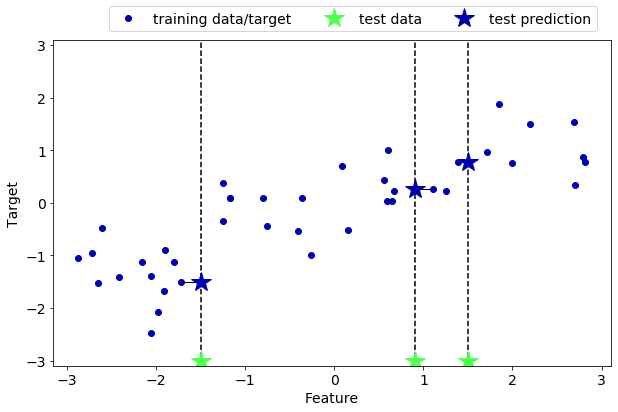

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

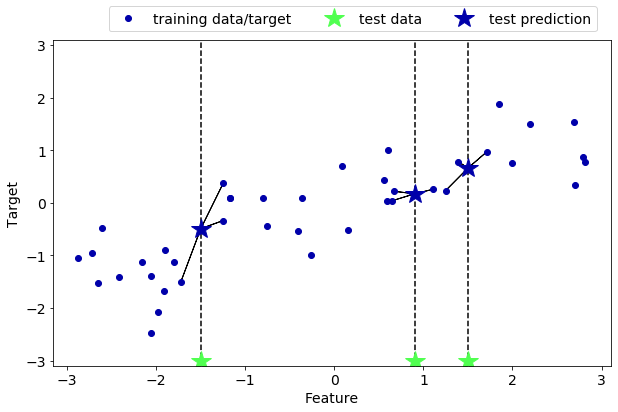

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

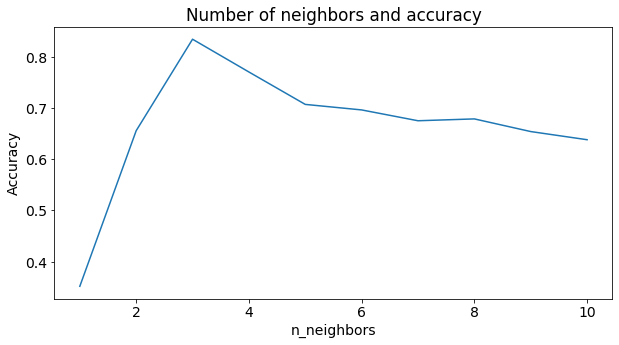

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=0
)

x = []
y = []
for k in range(1, 11): 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    x.append(k)
    y.append(knn.score(X_test, y_test))

plt.plot(x, y)
plt.title("Number of neighbors and accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

Strengths:
* Easy to understand 
* Fast training

Weaknesses:
* Badly with datasets with many features
* If dataset is large, a prediction might be slow
* Badly with sparse datasets
